In [1]:
#Imports
import re
import prepare as p
import acquire as a
from requests import get
from bs4 import BeautifulSoup

import unicodedata
import nltk
from wordcloud import WordCloud

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from env import get_connection

# 1. Spam Data

* Load the spam data set.
* Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
* Is there any overlap in the bigrams for the spam data and the ham data?
* Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [2]:
#Get SQL database url
url = get_connection('spam_db')

In [3]:
#Define SQL query
query = '''
        SELECT *
        FROM spam
        '''

In [4]:
#Read SQL
df = pd.read_sql(query, url, index_col='id')
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
# we can do that process with a join on a Series and not just a list
# we will do that for ham words, spam words, and all words
# we will pass our basic cleaning on top of that

ham_words = p.advanced_clean(' '.join(df[df.label=="ham"]['text']), l = True, extra_words = ['r', 'u', '2', '4', 'ltgt'])
spam_words = p.advanced_clean(' '.join(df[df.label=="spam"]['text']), l = True, extra_words = ['r', 'u', '2', '4', 'ltgt'])
all_words = p.advanced_clean(' '.join(df['text']), l = True, extra_words = ['r', 'u', '2', '4', 'ltgt'])

Removed 29547 stopwords
---
Removed 5550 stopwords
---
Removed 35097 stopwords
---


In [7]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [8]:
spam_freq.head()

call    359
free    216
txt     150
ur      144
text    137
dtype: int64

In [9]:
ham_freq.head()

im      449
get     314
go      273
ok      272
dont    257
dtype: int64

In [10]:
# we can do that process with a join on a Series and not just a list
# we will do that for ham words, spam words, and all words
# we will pass our basic cleaning on top of that

ham_words = p.basic_clean(' '.join(df[df.label=="ham"]['text']))
spam_words = p.basic_clean(' '.join(df[df.label=="spam"]['text']))
all_words = p.basic_clean(' '.join(df['text']))

In [11]:
ham_words

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat ok lar joking wif u oni u dun say so early hor u c already then say nah i dont think he goes to usf he lives around here though even my brother is not like to speak with me they treat me like aids patent as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune im gonna be home soon and i dont want to talk about this stuff anymore tonight k ive cried enough today ive been searching for the right words to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all times i have a date on sunday with will oh kim watching here eh u remember how 2 spell his name yes i did he v naughty make until i v wet fine if thataos the way u feel thataos the way its gota b is that seriously how you spell his name ium going

In [12]:
ham_words = p.tokenize(ham_words)
spam_words = p.tokenize(spam_words)
all_words = p.tokenize(all_words)

In [13]:
ham_words = p.remove_stopwords(ham_words, extra_words = ['r','u','2','4','ltgt'])
spam_words = p.remove_stopwords(spam_words, extra_words = ['r','u','2','4','ltgt'])
all_words = p.remove_stopwords(all_words, extra_words = ['r','u','2','4','ltgt'])

Removed 29547 stopwords
---
Removed 5550 stopwords
---
Removed 35097 stopwords
---


In [14]:
ham_words = p.lemmatize(ham_words).split()
spam_words = p.lemmatize(spam_words).split()
all_words = p.lemmatize(all_words).split()

In [15]:
len(all_words), len(spam_words), len(ham_words)

(50018, 12044, 37974)

In [16]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [17]:
spam_freq.head()

call    359
free    216
txt     150
ur      144
text    137
dtype: int64

In [18]:
ham_freq.head()

im      449
get     314
go      273
ok      272
dont    257
dtype: int64

In [19]:
list(nltk.bigrams(spam_words))

[('free', 'entry'),
 ('entry', 'wkly'),
 ('wkly', 'comp'),
 ('comp', 'win'),
 ('win', 'fa'),
 ('fa', 'cup'),
 ('cup', 'final'),
 ('final', 'tkts'),
 ('tkts', '21st'),
 ('21st', 'may'),
 ('may', '2005'),
 ('2005', 'text'),
 ('text', 'fa'),
 ('fa', '87121'),
 ('87121', 'receive'),
 ('receive', 'entry'),
 ('entry', 'questionstd'),
 ('questionstd', 'txt'),
 ('txt', 'ratetcs'),
 ('ratetcs', 'apply'),
 ('apply', '08452810075over18s'),
 ('08452810075over18s', 'freemsg'),
 ('freemsg', 'hey'),
 ('hey', 'darling'),
 ('darling', '3'),
 ('3', 'week'),
 ('week', 'word'),
 ('word', 'back'),
 ('back', 'id'),
 ('id', 'like'),
 ('like', 'fun'),
 ('fun', 'still'),
 ('still', 'tb'),
 ('tb', 'ok'),
 ('ok', 'xxx'),
 ('xxx', 'std'),
 ('std', 'chgs'),
 ('chgs', 'send'),
 ('send', 'a150'),
 ('a150', 'rcv'),
 ('rcv', 'winner'),
 ('winner', 'valued'),
 ('valued', 'network'),
 ('network', 'customer'),
 ('customer', 'selected'),
 ('selected', 'receivea'),
 ('receivea', 'a900'),
 ('a900', 'prize'),
 ('prize', 'rew

In [20]:
list(nltk.bigrams(ham_words))

[('go', 'jurong'),
 ('jurong', 'point'),
 ('point', 'crazy'),
 ('crazy', 'available'),
 ('available', 'bugis'),
 ('bugis', 'n'),
 ('n', 'great'),
 ('great', 'world'),
 ('world', 'la'),
 ('la', 'e'),
 ('e', 'buffet'),
 ('buffet', 'cine'),
 ('cine', 'got'),
 ('got', 'amore'),
 ('amore', 'wat'),
 ('wat', 'ok'),
 ('ok', 'lar'),
 ('lar', 'joking'),
 ('joking', 'wif'),
 ('wif', 'oni'),
 ('oni', 'dun'),
 ('dun', 'say'),
 ('say', 'early'),
 ('early', 'hor'),
 ('hor', 'c'),
 ('c', 'already'),
 ('already', 'say'),
 ('say', 'nah'),
 ('nah', 'dont'),
 ('dont', 'think'),
 ('think', 'go'),
 ('go', 'usf'),
 ('usf', 'life'),
 ('life', 'around'),
 ('around', 'though'),
 ('though', 'even'),
 ('even', 'brother'),
 ('brother', 'like'),
 ('like', 'speak'),
 ('speak', 'treat'),
 ('treat', 'like'),
 ('like', 'aid'),
 ('aid', 'patent'),
 ('patent', 'per'),
 ('per', 'request'),
 ('request', 'melle'),
 ('melle', 'melle'),
 ('melle', 'oru'),
 ('oru', 'minnaminunginte'),
 ('minnaminunginte', 'nurungu'),
 ('nurung

<Axes: >

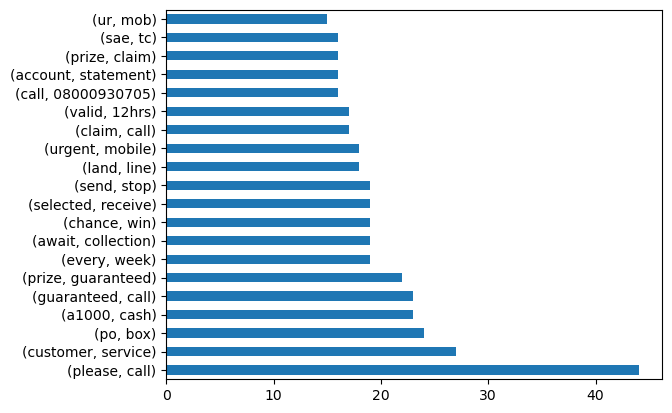

In [21]:
pd.Series(nltk.bigrams(spam_words)).value_counts().head(20).plot.barh()

<Axes: >

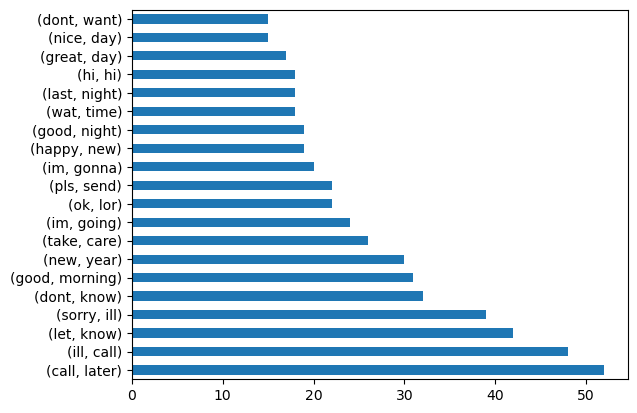

In [22]:
pd.Series(nltk.bigrams(ham_words)).value_counts().head(20).plot.barh()

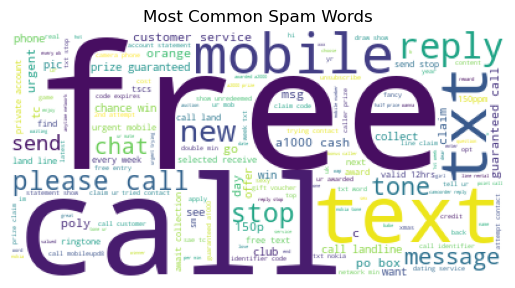

In [23]:
img = WordCloud(background_color='white').generate(' '.join(spam_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Spam Words')
plt.show()

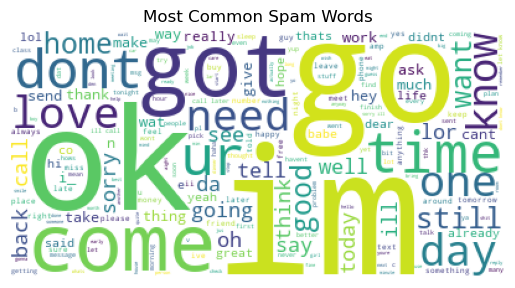

In [24]:
img = WordCloud(background_color='white').generate(' '.join(ham_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Spam Words')
plt.show()

In [25]:
# lets combine all 3 dfs horizontally
# fill any missing values with zero
# convert the resulting df to contain only integer values:

word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ['ham', 'spam', 'all']

word_counts.head()

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279


In [26]:
# sort by 'ham' and 'spam' columns

word_counts.sort_values(['ham', 'spam', 'all'], ascending=False)

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279
...,...,...,...
resub,0,1,1
expired,0,1,1
9153,0,1,1
okmail,0,1,1


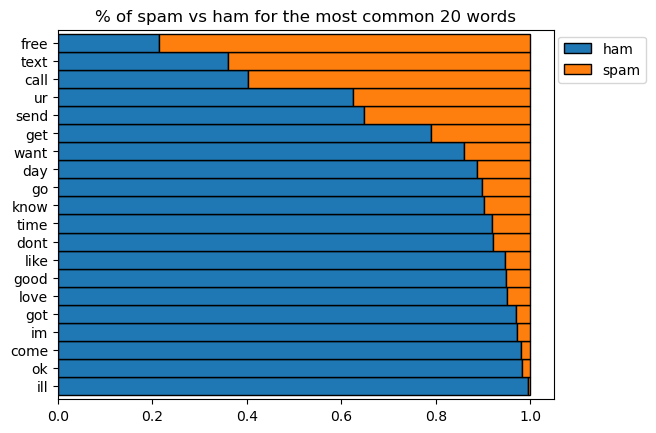

In [27]:
(word_counts.sort_values('all', ascending=False)
.head(20)
.apply(lambda row: row/row['all'], axis=1)
.drop(columns='all')
.sort_values(by='spam')
.plot.barh(stacked=True, width=1, ec='black')
)


plt.title('% of spam vs ham for the most common 20 words')
plt.legend(bbox_to_anchor=(1.2, 1.0),loc='upper right')
plt.show()

In [28]:
list(nltk.ngrams(spam_words, 3))

[('free', 'entry', 'wkly'),
 ('entry', 'wkly', 'comp'),
 ('wkly', 'comp', 'win'),
 ('comp', 'win', 'fa'),
 ('win', 'fa', 'cup'),
 ('fa', 'cup', 'final'),
 ('cup', 'final', 'tkts'),
 ('final', 'tkts', '21st'),
 ('tkts', '21st', 'may'),
 ('21st', 'may', '2005'),
 ('may', '2005', 'text'),
 ('2005', 'text', 'fa'),
 ('text', 'fa', '87121'),
 ('fa', '87121', 'receive'),
 ('87121', 'receive', 'entry'),
 ('receive', 'entry', 'questionstd'),
 ('entry', 'questionstd', 'txt'),
 ('questionstd', 'txt', 'ratetcs'),
 ('txt', 'ratetcs', 'apply'),
 ('ratetcs', 'apply', '08452810075over18s'),
 ('apply', '08452810075over18s', 'freemsg'),
 ('08452810075over18s', 'freemsg', 'hey'),
 ('freemsg', 'hey', 'darling'),
 ('hey', 'darling', '3'),
 ('darling', '3', 'week'),
 ('3', 'week', 'word'),
 ('week', 'word', 'back'),
 ('word', 'back', 'id'),
 ('back', 'id', 'like'),
 ('id', 'like', 'fun'),
 ('like', 'fun', 'still'),
 ('fun', 'still', 'tb'),
 ('still', 'tb', 'ok'),
 ('tb', 'ok', 'xxx'),
 ('ok', 'xxx', 'std'),

In [29]:
list(nltk.ngrams(ham_words, 3))

[('go', 'jurong', 'point'),
 ('jurong', 'point', 'crazy'),
 ('point', 'crazy', 'available'),
 ('crazy', 'available', 'bugis'),
 ('available', 'bugis', 'n'),
 ('bugis', 'n', 'great'),
 ('n', 'great', 'world'),
 ('great', 'world', 'la'),
 ('world', 'la', 'e'),
 ('la', 'e', 'buffet'),
 ('e', 'buffet', 'cine'),
 ('buffet', 'cine', 'got'),
 ('cine', 'got', 'amore'),
 ('got', 'amore', 'wat'),
 ('amore', 'wat', 'ok'),
 ('wat', 'ok', 'lar'),
 ('ok', 'lar', 'joking'),
 ('lar', 'joking', 'wif'),
 ('joking', 'wif', 'oni'),
 ('wif', 'oni', 'dun'),
 ('oni', 'dun', 'say'),
 ('dun', 'say', 'early'),
 ('say', 'early', 'hor'),
 ('early', 'hor', 'c'),
 ('hor', 'c', 'already'),
 ('c', 'already', 'say'),
 ('already', 'say', 'nah'),
 ('say', 'nah', 'dont'),
 ('nah', 'dont', 'think'),
 ('dont', 'think', 'go'),
 ('think', 'go', 'usf'),
 ('go', 'usf', 'life'),
 ('usf', 'life', 'around'),
 ('life', 'around', 'though'),
 ('around', 'though', 'even'),
 ('though', 'even', 'brother'),
 ('even', 'brother', 'like'),

<Axes: >

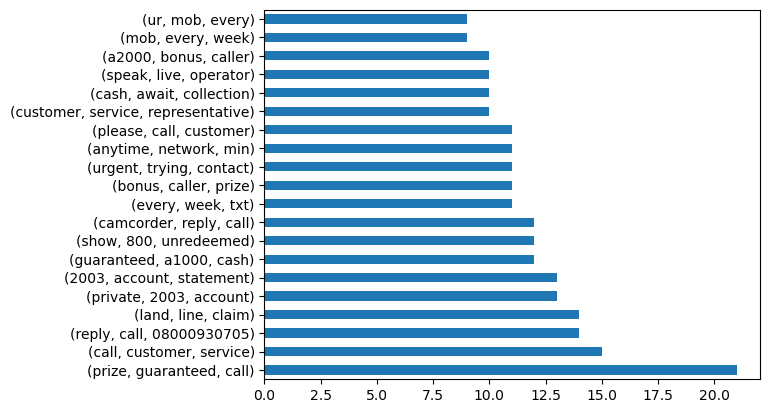

In [30]:
pd.Series(nltk.ngrams(spam_words, 3)).value_counts().head(20).plot.barh()

<Axes: >

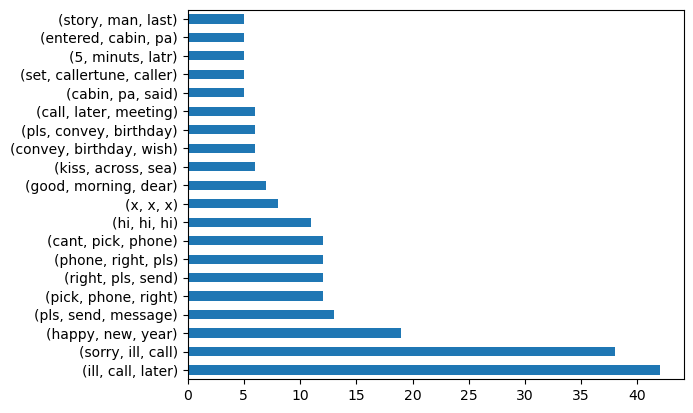

In [31]:
pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(20).plot.barh()

# 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [32]:
df = a.get_blog_articles_data()
df.head()

,title,content
0,Spotlight on APIDA Voices: Celebrating Heritag...,May is traditionally known as Asian American a...
1,Women in tech: Panelist Spotlight – Magdalena ...,Women in tech: Panelist Spotlight – Magdalena ...
2,Women in tech: Panelist Spotlight – Rachel Rob...,Women in tech: Panelist Spotlight – Rachel Rob...
3,Women in Tech: Panelist Spotlight – Sarah Mellor,Women in tech: Panelist Spotlight – Sarah Mell...
4,Women in Tech: Panelist Spotlight – Madeleine ...,Women in tech: Panelist Spotlight – Madeleine ...


In [33]:
words = p.advanced_clean2(' '.join(df.content), l = True).split()

Removed 1013 stopwords
---


In [34]:
words_freq = pd.Series(words).value_counts()

In [35]:
words_freq.head()

asian        12
panelist     11
spotlight    10
u            10
career       10
dtype: int64

In [36]:
list(nltk.bigrams(words))

[('may', 'traditionally'),
 ('traditionally', 'known'),
 ('known', 'asian'),
 ('asian', 'american'),
 ('american', 'pacific'),
 ('pacific', 'islander'),
 ('islander', 'aapi'),
 ('aapi', 'heritage'),
 ('heritage', 'month'),
 ('month', 'month'),
 ('month', 'celebrate'),
 ('celebrate', 'history'),
 ('history', 'contribution'),
 ('contribution', 'made'),
 ('made', 'possible'),
 ('possible', 'aapi'),
 ('aapi', 'friend'),
 ('friend', 'family'),
 ('family', 'community'),
 ('community', 'also'),
 ('also', 'examine'),
 ('examine', 'level'),
 ('level', 'support'),
 ('support', 'seek'),
 ('seek', 'opportunity'),
 ('opportunity', 'better'),
 ('better', 'understand'),
 ('understand', 'aapi'),
 ('aapi', 'community'),
 ('community', 'effort'),
 ('effort', 'address'),
 ('address', 'real'),
 ('real', 'concern'),
 ('concern', 'experience'),
 ('experience', 'sat'),
 ('sat', 'thapa'),
 ('thapa', 'one'),
 ('one', 'codeups'),
 ('codeups', 'financial'),
 ('financial', 'aid'),
 ('aid', 'enrollment'),
 ('enrol

<Axes: >

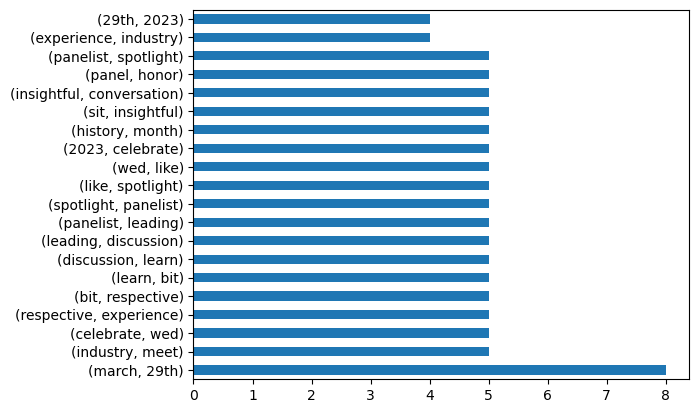

In [37]:
pd.Series(nltk.bigrams(words)).value_counts().head(20).plot.barh()

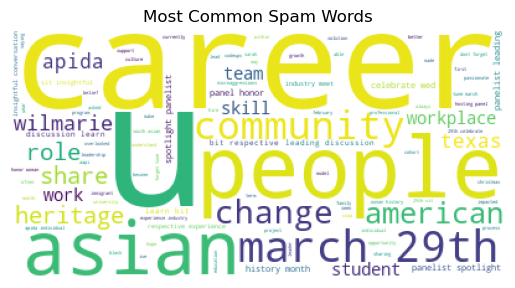

In [38]:
img = WordCloud(background_color='white').generate(' '.join(words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Spam Words')
plt.show()

# 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [39]:
categories = ['business', 'sports', 'technology', 'entertainment']

inshorts = []

for category in categories:
    
    url = 'https://inshorts.com/en/read' + '/' + category
    response = get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    titles = [span.text for span in soup.find_all('span', itemprop='headline')]
    contents = [div.text for div in soup.find_all('div', itemprop='articleBody')]
    
    for i in range(len(titles)):
        
        article = {
            'title': titles[i],
            'content': contents[i],
            'category': category,
        }
        
        inshorts.append(article)
        inshorts_df = pd.DataFrame(inshorts)
        

In [40]:
inshorts_df.head()

,title,content,category
0,Victoria's Secret ex-CEO cuts Harvard ties for...,Victoria's Secret ex-CEO Leslie Wexner's found...,business
1,HDFC Bank's Vigil Aunty ad gets criticism for ...,HDFC Bank's latest advertisement featuring Vig...,business
2,IMEC big opportunity for investors to partner ...,PM Narendra Modi at the Global Maritime India ...,business
3,"ICICI Bank fined ₹12 crore, Kotak ₹3.95 crore ...",The Reserve Bank of India (RBI) has imposed a ...,business
4,35 lakh weddings in 23 days to generate record...,Traders' body Confederation of All India Trade...,business


In [41]:
inshorts_df.category.value_counts()

business         10
sports           10
technology       10
entertainment    10
Name: category, dtype: int64

In [42]:
df = inshorts_df.content

In [46]:
df = p.advanced_clean(' '.join(df), l = True).split()

Removed 881 stopwords
---


In [49]:
words_freq = pd.Series(df).value_counts()

In [50]:
words_freq

said        22
added       13
employee    11
new         10
south       10
            ..
david        1
warner       1
day          1
recently     1
told         1
Length: 922, dtype: int64

In [51]:
list(nltk.bigrams(df))

[('victoria', 'secret'),
 ('secret', 'exceo'),
 ('exceo', 'leslie'),
 ('leslie', 'wexners'),
 ('wexners', 'foundation'),
 ('foundation', 'announced'),
 ('announced', 'cutting'),
 ('cutting', 'financial'),
 ('financial', 'programmatic'),
 ('programmatic', 'tie'),
 ('tie', 'harvard'),
 ('harvard', 'stunned'),
 ('stunned', 'sickened'),
 ('sickened', 'dismal'),
 ('dismal', 'failure'),
 ('failure', 'harvard'),
 ('harvard', 'leadership'),
 ('leadership', 'take'),
 ('take', 'clearstand'),
 ('clearstand', 'barbaric'),
 ('barbaric', 'murder'),
 ('murder', 'innocent'),
 ('innocent', 'israeli'),
 ('israeli', 'civilian'),
 ('civilian', 'wexner'),
 ('wexner', 'foundation'),
 ('foundation', 'said'),
 ('said', 'harvard'),
 ('harvard', 'leader'),
 ('leader', 'tiptoeing'),
 ('tiptoeing', 'hamas'),
 ('hamas', 'attack'),
 ('attack', 'israel'),
 ('israel', 'added'),
 ('added', 'hdfc'),
 ('hdfc', 'bank'),
 ('bank', 'latest'),
 ('latest', 'advertisement'),
 ('advertisement', 'featuring'),
 ('featuring', 'vi

In [53]:
list(nltk.ngrams(df, 3))

[('victoria', 'secret', 'exceo'),
 ('secret', 'exceo', 'leslie'),
 ('exceo', 'leslie', 'wexners'),
 ('leslie', 'wexners', 'foundation'),
 ('wexners', 'foundation', 'announced'),
 ('foundation', 'announced', 'cutting'),
 ('announced', 'cutting', 'financial'),
 ('cutting', 'financial', 'programmatic'),
 ('financial', 'programmatic', 'tie'),
 ('programmatic', 'tie', 'harvard'),
 ('tie', 'harvard', 'stunned'),
 ('harvard', 'stunned', 'sickened'),
 ('stunned', 'sickened', 'dismal'),
 ('sickened', 'dismal', 'failure'),
 ('dismal', 'failure', 'harvard'),
 ('failure', 'harvard', 'leadership'),
 ('harvard', 'leadership', 'take'),
 ('leadership', 'take', 'clearstand'),
 ('take', 'clearstand', 'barbaric'),
 ('clearstand', 'barbaric', 'murder'),
 ('barbaric', 'murder', 'innocent'),
 ('murder', 'innocent', 'israeli'),
 ('innocent', 'israeli', 'civilian'),
 ('israeli', 'civilian', 'wexner'),
 ('civilian', 'wexner', 'foundation'),
 ('wexner', 'foundation', 'said'),
 ('foundation', 'said', 'harvard'),

<Axes: >

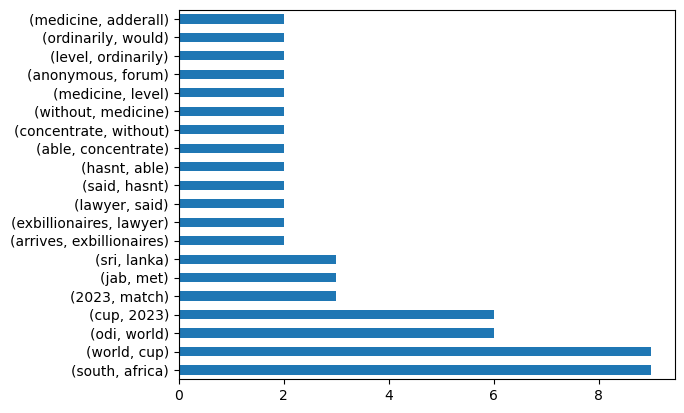

In [54]:
pd.Series(nltk.bigrams(df)).value_counts().head(20).plot.barh()

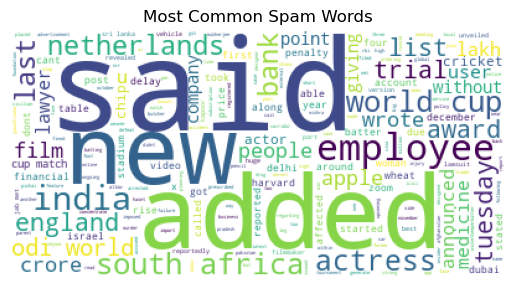

In [55]:
img = WordCloud(background_color='white').generate(' '.join(df))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Spam Words')
plt.show()

In [1]:
import pyspark
spark = pyspark.sql.SparkSession.builder.getOrCreate()
spark.range(5).show()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/25 10:15:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+



In [2]:
import pyspark

spark = pyspark.sql.SparkSession.builder.getOrCreate()


In [3]:
import multiprocessing
import pyspark

nprocs = multiprocessing.cpu_count()

spark = (pyspark.sql.SparkSession.builder
 .master('local')
 .config('spark.jars.packages', 'mysql:mysql-connector-java:8.0.16')
 .config('spark.driver.memory', '4G')
 .config('spark.driver.cores', nprocs)
 .config('spark.sql.shuffle.partitions', nprocs)
 .appName('MySparkApplication')
 .getOrCreate())


23/10/25 10:16:24 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
